In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
plt.style.use('ggplot')
%matplotlib inline

In [2]:
train_data = pd.read_csv("http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw4/hw4_train.dat", header=None, sep=" ")
train_data.insert(0,'w0',1.)
train_x = np.array(train_data.iloc[:,:-1])
train_y = np.array(train_data.iloc[:,-1])
test_data = pd.read_csv("http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw4/hw4_test.dat", header=None, sep=" ")
test_data.insert(0,'w0', 1.)
test_x = np.array(test_data.iloc[:,:-1])
test_y = np.array(test_data.iloc[:,-1])
# Problem 16-20
train_x_new = train_x[:120]
train_y_new = train_y[:120]
train_x_valid = train_x[-80:]
train_y_valid = train_y[-80:]

In [3]:
def ridge_regression(x, y, lamb=0):
    A = np.linalg.pinv(np.dot(x,x.transpose())+lamb*np.identity(x.shape[0]))
    return np.dot(y, np.dot(A,x))
def g(x, w):
    return np.sign(np.dot(x, w))
def E(g, y):
    return 1-np.sum(g==y)/float(len(g))

# Problem 13

In [4]:
w_reg_13 = ridge_regression(train_x, train_y, 11.26)
E_in = E(g(train_x, w_reg_13), train_y)
E_out = E(g(test_x, w_reg_13), test_y)
print "E_in =", E_in
print "E_out =", E_out

E_in = 0.055
E_out = 0.052


# Problem 14 & 15

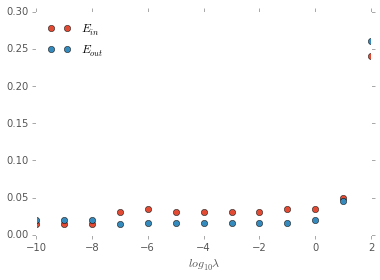

In [5]:
log_lambda = range(-10,3)
log_lambda.reverse()
lambdas = [10**i for i in log_lambda]
w_reg_14 = [ridge_regression(train_x, train_y, l) for l in lambdas]
E_in_14 = [E(g(train_x, w), train_y) for w in w_reg_14]
E_out_14 = [E(g(test_x, w), test_y) for w in w_reg_14]
plt.plot(log_lambda, E_in_14,'o', label = r"$E_{in}$")
plt.plot(log_lambda, E_out_14,'o', label = r"$E_{out}$")
plt.xlabel(r"$log_{10}\lambda$")
plt.legend(loc = 2)

## Problem 14

In [6]:
i = np.argmin(E_in_14)
print "log_10(lambda) =", log_lambda[i]
print "E_in =", E_in_14[i]
print "E_out =", E_out_14[i]

log_10(lambda) = -8
E_in = 0.015
E_out = 0.02


## Problem 15

In [7]:
i = np.argmin(E_out_14)
print "log_10(lambda) =", log_lambda[i]
print "E_in =", E_in_14[i]
print "E_out =", E_out_14[i]

log_10(lambda) = -7
E_in = 0.03
E_out = 0.015


# Problem 16 & 17

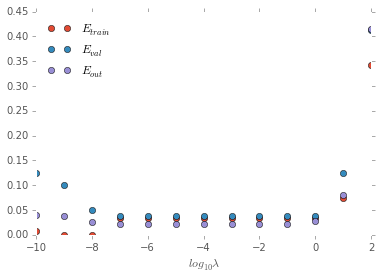

In [8]:
w_reg_16 = [ridge_regression(train_x_new, train_y_new, l) for l in lambdas]
E_train_16 = [E(g(train_x_new, w), train_y_new) for w in w_reg_16]
E_val_16 = [E(g(train_x_valid, w), train_y_valid) for w in w_reg_16]
E_out_16 = [E(g(test_x, w), test_y) for w in w_reg_16]
plt.plot(log_lambda, E_train_16,'o', label = r"$E_{train}$")
plt.plot(log_lambda, E_val_16,'o', label = r"$E_{val}$")
plt.plot(log_lambda, E_out_16,'o', label = r"$E_{out}$")
plt.xlabel(r"$log_{10}\lambda$")
plt.legend(loc = 2)

## Problem 16

In [9]:
i = np.argmin(E_train_16)
print "log_10(lambda) =", log_lambda[i]
print "E_train =", E_train_16[i]
print "E_val =", E_val_16[i]
print "E_out =", E_out_16[i]

log_10(lambda) = -8
E_train = 0.0
E_val = 0.05
E_out = 0.025


## Problem 17

In [10]:
i = np.argmin(E_val_16)
print "log_10(lambda) =", log_lambda[i]
print "E_train =", E_train_16[i]
print "E_val =", E_val_16[i]
print "E_out =", E_out_16[i]
best_i = i

log_10(lambda) = 0
E_train = 0.0333333333333
E_val = 0.0375
E_out = 0.028


# Problem 18

In [11]:
w_reg_18 = ridge_regression(train_x, train_y, lambdas[best_i])
E_in = E(g(train_x, w_reg_18), train_y)
E_out = E(g(test_x, w_reg_18), test_y)
print "E_in =", E_in
print "E_out =", E_out

E_in = 0.035
E_out = 0.02


# Problem 19

In [12]:
E_cv = []
for l in lambdas:
    e = []
    for train , valid in KFold(200, 5):
        w_reg = ridge_regression(train_x[train], train_y[train], l)
        e.append(E(g(train_x[valid], w_reg), train_y[valid]))
    E_cv.append(np.mean(e))

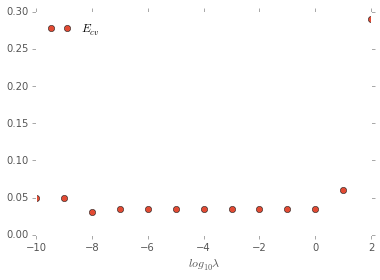

log_10(lambda) = -8
E_cvl = 0.03


In [13]:
plt.plot(log_lambda, E_cv,'o', label = r"$E_{cv}$")
plt.xlabel(r"$log_{10}\lambda$")
plt.legend(loc = 2)
plt.show()
i = np.argmin(E_cv)
print "log_10(lambda) =", log_lambda[i]
print "E_cvl =", E_cv[i]
best_i = i

# Problem 20

In [14]:
w_reg_20 = ridge_regression(train_x, train_y, lambdas[best_i])
E_in = E(g(train_x, w_reg_20), train_y)
E_out = E(g(test_x, w_reg_20), test_y)
print "E_in =", E_in
print "E_out =", E_out

E_in = 0.015
E_out = 0.02
